<a href="https://colab.research.google.com/github/Ibertson86/projeto-eda-ebac/blob/main/projeto_analise_ancine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# Análise de Dados: Análise Exploratória de Dados de Logística


---

Aluno: Ibertson Medeiros Silva

github: https://github.com/Ibertson86

---

## 1 - Contexto

* O seguinte notebook visa criar uma análise exploratória de dados, com informações
fornecidas publicamente pela ANCINE(Agência Nacional de Cinema). O objetivo é
fazer uma análise das salas de exibição de filmes e dos complexos registrados
pelo órgão em todo o país.

## 2\. Exploração de Dados

### **2.1.  Coleta**

O link que utilizei para extrair os dados foi o que está logo abaixo. Trata-se
de dados em formato JSON.

In [1]:
!wget -q "https://dados.ancine.gov.br/dados-abertos/salas-de-exibicao-e-complexos.json" -O salas_ancine.json

### **2.2.  Importação das Bibliotecas**

In [2]:
import pandas as pd
from pandas import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt

### **2.2.  Criando um DataFrame com o arquivo JSON e convertendo CSV**

In [3]:
#Leitura dos dados em JSON
json_cine = 'salas_ancine.json'
cine_df = pd.read_json(json_cine)

#Normalizando o JSON, caso tenha estruturas aninhadas.
df = json_normalize(cine_df)

#Conversão dos dados em CSV, caso seja necessário
csv_cine = 'salas_ancine.csv'
cine_df.to_csv(csv_cine, index=False)

print(f'Arquivo CSV salvo como {csv_cine}')

Arquivo CSV salvo como salas_ancine.csv


## 3\. Análise Exploratória e Manipulação de Dados

* Ao verificarmos o DataFrame criado existe apenas uma coluna 'data' com 6127
linhas, mas não queremos isso. Queremos inicialmente um total de 32 colunas com as informações dos dicionários.

In [4]:
#expandindo o dataframe, transformando em colunas as chaves dos dicionários
cine_df_expanded = cine_df['data'].apply(pd.Series)

In [5]:
cine_df_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6127 entries, 0 to 6126
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DATA_SITUACAO_SALA              6092 non-null   object 
 1   CNPJ_SALA                       6127 non-null   object 
 2   ASSENTOS_OBESIDADE              4273 non-null   float64
 3   REGISTRO_EXIBIDOR               6127 non-null   object 
 4   ASSENTOS_CADEIRANTES            4881 non-null   float64
 5   ACESSO_SALA_COM_RAMPA           6127 non-null   object 
 6   NOME_COMPLEXO                   6127 non-null   object 
 7   COMPLEXO_ITINERANTE             6127 non-null   object 
 8   CNPJ_EXIBIDOR                   6127 non-null   object 
 9   NOME_GRUPO_EXIBIDOR             6127 non-null   object 
 10  SITUACAO_COMPLEXO               6127 non-null   object 
 11  ENDERECO_COMPLEXO               6105 non-null   object 
 12  ACESSO_ASSENTOS_COM_RAMPA       61

In [6]:
cine_df_expanded.head()

,DATA_SITUACAO_SALA,CNPJ_SALA,ASSENTOS_OBESIDADE,REGISTRO_EXIBIDOR,ASSENTOS_CADEIRANTES,ACESSO_SALA_COM_RAMPA,NOME_COMPLEXO,COMPLEXO_ITINERANTE,CNPJ_EXIBIDOR,NOME_GRUPO_EXIBIDOR,...,ASSENTOS_SALA,REGISTRO_SALA,BANHEIROS_ACESSIVEIS,NUMERO_ENDERECO_COMPLEXO,BAIRRO_COMPLEXO,UF_COMPLEXO,DATA_SITUACAO_COMPLEXO,DATA_INICIO_FUNCIONAMENTO_SALA,SITUACAO_EXIBIDOR,OPERACAO_USUAL
0,29/08/2011,10.615.866/0001-60,NaN,19954,NaN,NÃO,02 P D & ARAUJO EMPRESA CINEMATOGRAFICA LTDA.,NÃO,10.615.866/0001-60,NÃO PERTENCE A NENHUM GRUPO EXIBIDOR,...,162.0,5003332,NÃO,None,CENTRO,SP,29/08/2011,16/12/2008,IRREGULAR,COMERCIAL
1,29/08/2011,10.615.866/0001-60,NaN,19954,NaN,NÃO,02 P D & ARAUJO EMPRESA CINEMATOGRAFICA LTDA.,NÃO,10.615.866/0001-60,NÃO PERTENCE A NENHUM GRUPO EXIBIDOR,...,162.0,5003331,NÃO,None,CENTRO,SP,29/08/2011,16/12/2008,IRREGULAR,COMERCIAL
2,24/04/2021,00.779.721/0054-53,5.0,1843,8.0,NÃO,2100 CINEMARK PARK SHOPPING SÃO CAETANO,NÃO,00.779.721/0001-41,CINEMARK,...,402.0,5003401,SIM,2041,CERAMICA,SP,24/04/2021,18/11/2011,REGULAR,COMERCIAL
3,24/04/2021,00.779.721/0054-53,4.0,1843,8.0,NÃO,2100 CINEMARK PARK SHOPPING SÃO CAETANO,NÃO,00.779.721/0001-41,CINEMARK,...,370.0,5003402,SIM,2041,CERAMICA,SP,24/04/2021,18/11/2011,REGULAR,COMERCIAL
4,24/04/2021,00.779.721/0054-53,3.0,1843,5.0,NÃO,2100 CINEMARK PARK SHOPPING SÃO CAETANO,NÃO,00.779.721/0001-41,CINEMARK,...,245.0,5003403,SIM,2041,CERAMICA,SP,24/04/2021,18/11/2011,REGULAR,COMERCIAL


 - Agora vamos dividir o DataFrame original em dois: um apenas com a coluna SITUACAO_EXIBIDOR com valor IRREGULAR e outro com a coluna SITUACAO_EXIBIDOR
 com valor REGULAR.

In [7]:
cine_df_irregular = cine_df_expanded[cine_df_expanded['SITUACAO_EXIBIDOR'] == 'IRREGULAR']
print(cine_df_irregular.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1819 entries, 0 to 6126
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DATA_SITUACAO_SALA              1795 non-null   object 
 1   CNPJ_SALA                       1819 non-null   object 
 2   ASSENTOS_OBESIDADE              694 non-null    float64
 3   REGISTRO_EXIBIDOR               1819 non-null   object 
 4   ASSENTOS_CADEIRANTES            939 non-null    float64
 5   ACESSO_SALA_COM_RAMPA           1819 non-null   object 
 6   NOME_COMPLEXO                   1819 non-null   object 
 7   COMPLEXO_ITINERANTE             1819 non-null   object 
 8   CNPJ_EXIBIDOR                   1819 non-null   object 
 9   NOME_GRUPO_EXIBIDOR             1819 non-null   object 
 10  SITUACAO_COMPLEXO               1819 non-null   object 
 11  ENDERECO_COMPLEXO               1804 non-null   object 
 12  ACESSO_ASSENTOS_COM_RAMPA       1819 no

In [8]:
cine_df_regular = cine_df_expanded[cine_df_expanded['SITUACAO_EXIBIDOR'] == 'REGULAR']
print(cine_df_regular.info())


<class 'pandas.core.frame.DataFrame'>
Index: 4308 entries, 2 to 6119
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DATA_SITUACAO_SALA              4297 non-null   object 
 1   CNPJ_SALA                       4308 non-null   object 
 2   ASSENTOS_OBESIDADE              3579 non-null   float64
 3   REGISTRO_EXIBIDOR               4308 non-null   object 
 4   ASSENTOS_CADEIRANTES            3942 non-null   float64
 5   ACESSO_SALA_COM_RAMPA           4308 non-null   object 
 6   NOME_COMPLEXO                   4308 non-null   object 
 7   COMPLEXO_ITINERANTE             4308 non-null   object 
 8   CNPJ_EXIBIDOR                   4308 non-null   object 
 9   NOME_GRUPO_EXIBIDOR             4308 non-null   object 
 10  SITUACAO_COMPLEXO               4308 non-null   object 
 11  ENDERECO_COMPLEXO               4301 non-null   object 
 12  ACESSO_ASSENTOS_COM_RAMPA       4308 no

- Agora queremos apenas as salas de exibição que estejam com a coluna SITUACAO_COMPLEXO como "EM FUNCIONAMENTO" para ambos os DataFrames.

In [9]:
cine_df_irregular_em_funcionamento = cine_df_irregular[cine_df_irregular['SITUACAO_COMPLEXO'] == 'EM FUNCIONAMENTO']
print(cine_df_irregular_em_funcionamento.info())

<class 'pandas.core.frame.DataFrame'>
Index: 390 entries, 721 to 6112
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DATA_SITUACAO_SALA              371 non-null    object 
 1   CNPJ_SALA                       390 non-null    object 
 2   ASSENTOS_OBESIDADE              251 non-null    float64
 3   REGISTRO_EXIBIDOR               390 non-null    object 
 4   ASSENTOS_CADEIRANTES            288 non-null    float64
 5   ACESSO_SALA_COM_RAMPA           390 non-null    object 
 6   NOME_COMPLEXO                   390 non-null    object 
 7   COMPLEXO_ITINERANTE             390 non-null    object 
 8   CNPJ_EXIBIDOR                   390 non-null    object 
 9   NOME_GRUPO_EXIBIDOR             390 non-null    object 
 10  SITUACAO_COMPLEXO               390 non-null    object 
 11  ENDERECO_COMPLEXO               376 non-null    object 
 12  ACESSO_ASSENTOS_COM_RAMPA       390 no

In [10]:
cine_df_regular_em_funcionamento = cine_df_regular[cine_df_regular['SITUACAO_COMPLEXO'] == 'EM FUNCIONAMENTO']
print(cine_df_regular_em_funcionamento.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3373 entries, 2 to 6115
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DATA_SITUACAO_SALA              3366 non-null   object 
 1   CNPJ_SALA                       3373 non-null   object 
 2   ASSENTOS_OBESIDADE              3090 non-null   float64
 3   REGISTRO_EXIBIDOR               3373 non-null   object 
 4   ASSENTOS_CADEIRANTES            3297 non-null   float64
 5   ACESSO_SALA_COM_RAMPA           3373 non-null   object 
 6   NOME_COMPLEXO                   3373 non-null   object 
 7   COMPLEXO_ITINERANTE             3373 non-null   object 
 8   CNPJ_EXIBIDOR                   3373 non-null   object 
 9   NOME_GRUPO_EXIBIDOR             3373 non-null   object 
 10  SITUACAO_COMPLEXO               3373 non-null   object 
 11  ENDERECO_COMPLEXO               3366 non-null   object 
 12  ACESSO_ASSENTOS_COM_RAMPA       3373 no

- Por último, antes de iniciar com uma análise mais profunda, vamos limpar ambos os DataFrames, ordenar e renomear as colunas, para a visualização ficar melhor.

In [11]:
#Resetando os índices
cine_df_irregular_em_funcionamento.reset_index(drop=True, inplace=True)
cine_df_regular_em_funcionamento.reset_index(drop=True, inplace=True)

In [12]:
#ordenando e renomeando as colunas das salas regulares em funcionamento
colunas_desejadas_regular = {
        'NOME_SALA': 'Nome Sala',
        'UF_COMPLEXO': 'UF',
        'MUNICIPIO_COMPLEXO': 'Municipio',
        'DATA_INICIO_FUNCIONAMENTO_SALA': 'Inicio Funcionamento',
        'ASSENTOS_SALA': 'Assentos na Sala',
        'ASSENTOS_OBESIDADE': 'Assentos para Obesos',
        'ASSENTOS_MOBILIDADE_REDUZIDA': 'Assentos Mob. Red.',
        'ASSENTOS_CADEIRANTES': 'Assentos Cadeirantes',
        'ACESSO_SALA_COM_RAMPA': 'Acesso Sala com Rampa',
        'ACESSO_ASSENTOS_COM_RAMPA': 'Acesso Assentos com Rampa',
        'BANHEIROS_ACESSIVEIS': 'Banheiros Acessiveis'
    }

#criando um DataFrame de salas regulares em funcionamento com apenas 11 colunas
df_regular_limpo = cine_df_regular_em_funcionamento[list(colunas_desejadas_regular.keys())].rename(columns=colunas_desejadas_regular)
df_regular_limpo.head()

,Nome Sala,UF,Municipio,Inicio Funcionamento,Assentos na Sala,Assentos para Obesos,Assentos Mob. Red.,Assentos Cadeirantes,Acesso Sala com Rampa,Acesso Assentos com Rampa,Banheiros Acessiveis
0,PARK SHOPPING 01,SP,SÃO CAETANO DO SUL,18/11/2011,402.0,5.0,5.0,8.0,NÃO,SIM,SIM
1,PARK SHOPPING 02,SP,SÃO CAETANO DO SUL,18/11/2011,370.0,4.0,4.0,8.0,NÃO,SIM,SIM
2,PARK SHOPPING 03,SP,SÃO CAETANO DO SUL,18/11/2011,245.0,3.0,3.0,5.0,NÃO,SIM,SIM
3,PARK SHOPPING 04,SP,SÃO CAETANO DO SUL,18/11/2011,332.0,3.0,3.0,5.0,NÃO,SIM,SIM
4,PARK SHOPPING 05,SP,SÃO CAETANO DO SUL,18/11/2011,210.0,3.0,3.0,4.0,NÃO,SIM,SIM


In [13]:
#ordenando e renomeando as colunas das salas irregulares em funcionamento
colunas_desejadas_irregular = {
        'NOME_SALA': 'Nome Sala',
        'UF_COMPLEXO': 'UF',
        'MUNICIPIO_COMPLEXO': 'Municipio',
        'DATA_INICIO_FUNCIONAMENTO_SALA': 'Inicio Funcionamento',
        'ASSENTOS_SALA': 'Assentos na Sala',
        'ASSENTOS_OBESIDADE': 'Assentos para Obesos',
        'ASSENTOS_MOBILIDADE_REDUZIDA': 'Assentos Mob. Red.',
        'ASSENTOS_CADEIRANTES': 'Assentos Cadeirantes',
        'ACESSO_SALA_COM_RAMPA': 'Acesso Sala com Rampa',
        'ACESSO_ASSENTOS_COM_RAMPA': 'Acesso Assentos com Rampa',
        'BANHEIROS_ACESSIVEIS': 'Banheiros Acessiveis'
    }

#criando um DataFrame de salas irregulares em funcionamento com apenas 11 colunas
df_irregular_limpo = cine_df_irregular_em_funcionamento[list(colunas_desejadas_irregular.keys())].rename(columns=colunas_desejadas_irregular)
df_irregular_limpo.head()

,Nome Sala,UF,Municipio,Inicio Funcionamento,Assentos na Sala,Assentos para Obesos,Assentos Mob. Red.,Assentos Cadeirantes,Acesso Sala com Rampa,Acesso Assentos com Rampa,Banheiros Acessiveis
0,CINE TEATRO PEGASUS,SP,SÃO BERNARDO DO CAMPO,02/04/2002,417.0,NaN,NaN,NaN,NÃO,NÃO,NÃO
1,CINE AVENIDA,SP,SÃO PAULO,02/09/1975,260.0,NaN,NaN,NaN,NÃO,NÃO,NÃO
2,CINE LAS VEGAS,SP,SÃO PAULO,02/09/1975,285.0,NaN,NaN,NaN,NÃO,NÃO,NÃO
3,ARTECINE,SC,BALNEÁRIO CAMBORIÚ,10/07/2017,40.0,1.0,6.0,1.0,NÃO,NÃO,SIM
4,ASSOCIAÇÃO COMUNITÁRIA MADRIGAL,SP,COSMÓPOLIS,01/02/2008,200.0,NaN,NaN,NaN,NÃO,NÃO,NÃO


- Notamos que existem alguns valores preenchidos como NaN(Not a Number), principalmente em colunas categóricas, como Nome Sala, UF e Municipio, além da coluna que contém datas, como Inicio Funcionamento. Esses valores não nos interessam, então vamos criar outro DataFrame excluindo esses valores NaN das referidas colunas.

In [14]:
df_cleaned_regular = df_regular_limpo.dropna(subset=['Nome Sala', 'UF', 'Municipio', 'Inicio Funcionamento'])
df_cleaned_irregular = df_irregular_limpo.dropna(subset=['Nome Sala', 'UF', 'Municipio', 'Inicio Funcionamento'])

- Agora existem valores NaN em colunas numéricas. Nessas colunas queremos preencher tais valores com 0.

In [15]:
#preenchendo os valores NaN por zero
df_cleaned_regular.fillna(0, inplace=True)
df_cleaned_irregular.fillna(0, inplace=True)

<ipython-input-15-d4138a6a42ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_regular.fillna(0, inplace=True)
<ipython-input-15-d4138a6a42ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_irregular.fillna(0, inplace=True)


## 4\. Visualização

Primeiramente vamos criar dois gráficos em formato de barras com o Seaborn
e Matplotlib. Cada um vai mostrar a quantidade de salas regulares e irregulares de cinema por Estados da Federação. No gráfico de salas irregulares podemos notar que existem alguns Estados que ficaram de fora da figura, pois não existem salas nessa condição em tais localidades, totalizando apenas 20 Estados.

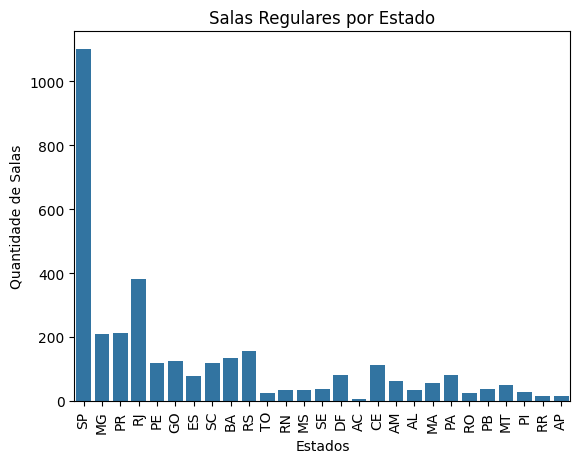

<Figure size 1000x600 with 0 Axes>

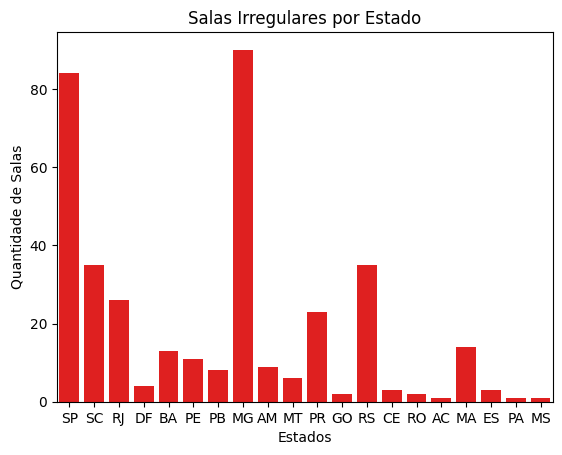

<Figure size 1000x600 with 0 Axes>

In [16]:
# Gráfico de barras empilhadas para salas regulares
sns.countplot(x='UF', data=df_cleaned_regular)
plt.title('Salas Regulares por Estado')
#criamos uma rotação nos ticks do eixo x para melhorar a visualização
plt.xticks(rotation=90)
plt.xlabel('Estados')
plt.ylabel('Quantidade de Salas')
plt.figure(figsize=(10,6))
plt.show()

# Gráfico de barras empilhadas para salas irregulares
sns.countplot(x='UF', data=df_cleaned_irregular, color='red')
plt.title('Salas Irregulares por Estado')
plt.xlabel('Estados')
plt.ylabel('Quantidade de Salas')
plt.figure(figsize=(10,6))
plt.show()

- Podemos criar dois Insights com base nos gráficos acima. O Estado que mais possui salas regulares é o Estado de São Paulo e o que tem menos é o Acre. E quanto às salas irregulares verificamos pela análise do gráfico que o Estado que possui mais irregularidades é o de Minas Gerais, seguido em segundo lugar por São Paulo.

- Vamos utilizar agora outra forma de visualização ao concatenarmos os dois DataFrames criados em um só, chamado df_cleaned. Dessa forma foi criada uma nova coluna chamada "Regular" com os valores 0(Não) e 1(Sim).

In [17]:
# Concatenando os dataframes
df_cleaned = pd.concat([df_cleaned_regular, df_cleaned_irregular], ignore_index=True)

# Criando a coluna 'regular'
df_cleaned['Regular'] = 0
df_cleaned.loc[df_cleaned.index[:len(df_cleaned_regular)], 'Regular'] = 1

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


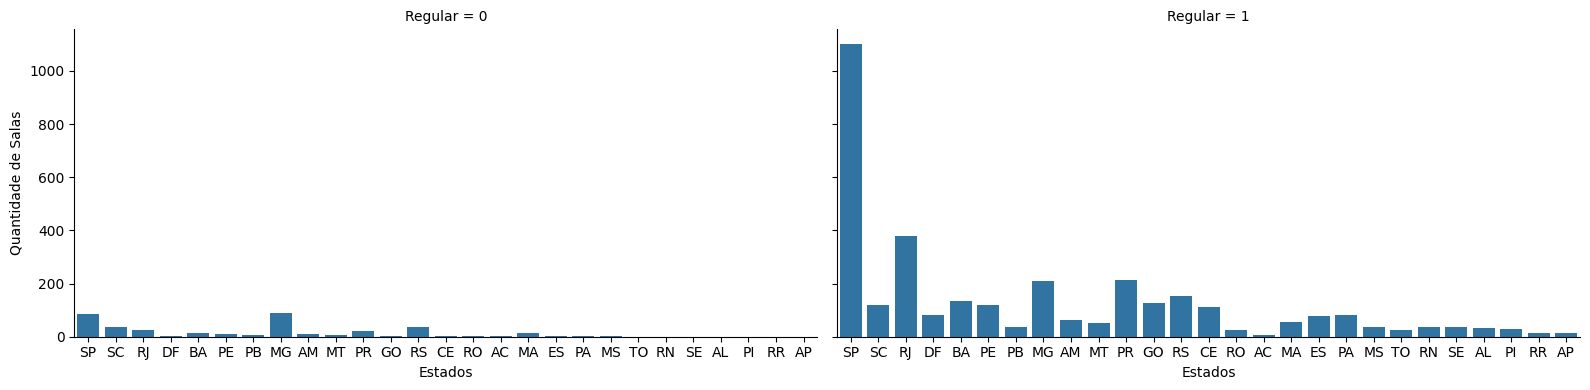

In [18]:
# Usando o FacetGrid para melhor visualização dos gráficos lado a lado,
# quanto à regularidade das salas por Estados.
g = sns.FacetGrid(df_cleaned, col="Regular", height=4, aspect=2)
g.map(sns.countplot, 'UF')
# Adicionando rótulo comum ao eixo X
g.set_xlabels('Estados')
# Adicionando rótulo comum ao eixo Y
g.set_ylabels('Quantidade de Salas')
plt.show()

- Por último podemos criar um gráfico de dispersão com o método sns.scatterplot
para analisar a relação entre o número de assentos para pessoas com Obesidade e a regularidade das salas, como um exemplo final dessa análise.

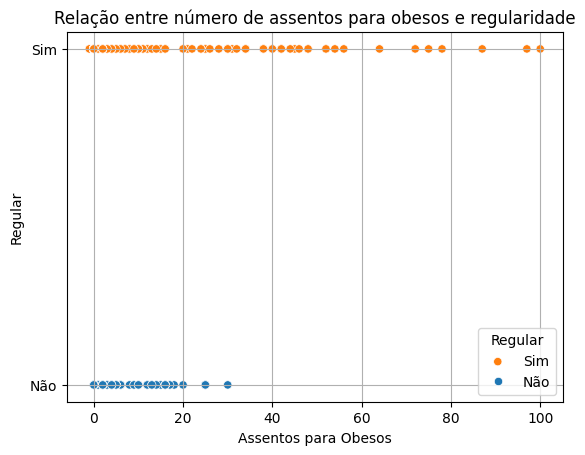

In [19]:
# Gráfico de dispersão
sns.scatterplot(x='Assentos para Obesos',y='Regular', hue='Regular', data=df_cleaned)
#adicionando uma grade ao gráfico
plt.grid(True)
#nomeando os ticks do eixo y no intervalo de 0 a 1
plt.yticks([0,1], ['Não', 'Sim'])
#legenda do gráfico
plt.legend(title='Regular', labels=['Sim', 'Não'])
plt.title('Relação entre número de assentos para obesos e regularidade')
plt.show()

- Como insight final podemos analisar a regularidade das salas no quesito de
possuir ou não assentos para obesos. No intervalo de 0 a 20 assentos a diferença
é quase imperceptível no número de salas, mas quando observamos o intervalo
de 20 a 40 assentos, as salas regulares existem em quantidade muito superior, que atendem esse critério, enquanto que raramente salas irregulares possuem mais que 20 assentos que atendam usuários na condição proposta.

## 4\. Conclusão

Nesse projeto de análise exploratória de dados poderíamos até trabalhar com outros dados, como por exemplo número de salas em determinado município, explorar salas por determinado Estado da Federação específico, mais explorações quanto ao número de salas ou utilizar outras colunas que acabamos deixando de fora do DataFrame final. No entanto, o projeto final teve como principal escopo coletar dados brutos de um banco de dados público, fazer uma limpeza de dados, manipulação utilizando as bibliotecas nativas e externas do Python e, por fim, a visualização através de gráficos de diferentes situações.

Para tanto tentei criar um Storytelling de Dados de maneira cadenciada e com o máximo de detalhes possível.